In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def MSE(b, w, X, Y):
  return np.sum((Y - w*X- b)**2)

In [7]:
X = np.array([338, 333, 328, 207, 226, 25, 179, 60, 208, 606], dtype='float32')
Y = np.array([640, 633, 619, 393, 428, 27, 193, 66, 226, 1591], dtype='float32')
loss = np.vectorize(lambda B, W : MSE(B, W, X, Y))

In [23]:
class optimizers:
  def __init__(self, X, Y, lr, Type='gradient_descent'):
    self.i = 0
    self.X = X
    self.Y = Y
    self.lr = lr
    self.theta = {'w':0, 'b':0}
    self.grad  = {'w':0, 'b':0}
    self.gamma = 1e-5
    self.beta1 = 0.9
    self.beta2 = 0.999
    self.eps = 1e-8
    self.m = {'w':0, 'b':0}
    self.v = {'w':0, 'b':0}
    self.type = Type
    self.stop_criterion = False
    self.option = {'GD': self.GD, 'adagrad': self.AdaGrad, 'rms': self.RMS,
            'adam': self.Adam, 'adamax': self.AdaMax, 'adamw': self.AdamW}
    self.optimizer = self.option[Type]
    
    
  def compute_grad(self):
    tmp = -2*(self.Y-self.theta['w']*self.X-self.theta['b'])
    self.grad['w'], self.grad['b'] = np.dot(tmp, self.X), np.sum(tmp)

  
  def GD(self, var):
    self.theta[var] -= self.lr*self.grad[var]
      
      
  def AdaGrad(self, var):
    self.v[var] += self.grad[var]**2
    self.theta[var] -= self.lr*self.grad[var]/np.sqrt(self.v[var]+self.eps)
      
  
  def RMS(self, var):
    self.v[var] = self.beta1 * self.v[var] + (1-self.beta1) * self.grad[var]**2
    self.theta[var] -= self.lr*self.grad[var]/np.sqrt(self.v[var]+self.eps)
  

  def Adam(self, var):
    self.m[var] = self.beta1 * self.m[var] + (1-self.beta1) * self.grad[var]
    self.v[var] = self.beta2 * self.v[var] + (1-self.beta2) * self.grad[var]**2
    m_ = self.m[var]/(1-self.beta1**self.i)
    v_ = self.v[var]/(1-self.beta2**self.i)
    self.theta[var] -= self.lr*m_/np.sqrt(v_+self.eps)
      
  
  def AdaMax(self, var):
    self.m[var] = self.beta1 * self.m[var] + (1-self.beta1) * self.grad[var]
    self.v[var] = max(self.beta2*self.v[var], abs(self.grad[var]))
    self.theta[var] -= (self.lr/(1-self.beta1**self.i)) * (self.m[var]/self.v[var])


  def AdamW(self, var):
    g = self.grad[var] + self.gamma * self.theta[var]
    self.m[var] = self.beta1 * self.m[var] + (1-self.beta1) * g
    self.v[var] = self.beta2 * self.v[var] + (1-self.beta2) * g**2
    m_ = self.m[var]/(1-self.beta1**self.i)
    v_ = self.v[var]/(1-self.beta2**self.i)
    self.theta[var] -= self.lr*(m_ / np.sqrt(v_ + self.eps) + self.gamma * self.theta[var])


  def updata_parameter(self):
    self.i += 1
    self.compute_grad()
    w, b = self.theta['w'], self.theta['b']
    
    self.optimizer('w')
    self.optimizer('b')
    
    if abs(self.theta['b']-b) < 1e-5 and abs(self.theta['w']-w) < 1e-5:
        self.stop_criterion = True
    
    return self.theta['w'], self.theta['b']

In [9]:
def PlotSurf(b_history, w_history):
  b = np.linspace(-200, -100, 100)
  w = np.linspace(-5, 5, 25)
  B, W = np.meshgrid(b, w)
  Z = loss(W, B)

  plt.contourf(B, W, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
  plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3,color='orange')
  plt.plot(b_history, w_history, '*-', ms=3, lw=1.5, color='red')
  plt.colorbar()
  plt.xlim(-200,-100)
  plt.ylim(-5,5)
  plt.title("Loss surface")
  plt.show()

In [10]:
def Demo(w0, b0, lr, maxiter, X, Y, optimizer):
  optimizer.theta['w'], optimizer.theta['b'] = w0, b0
  w_history, b_history = [w0], [b0]
  start_time = time.time()

  for i in range(maxiter):
    w, b = optimizer.updata_parameter()
    w_history.append(w)
    b_history.append(b)
    if optimizer.stop_criterion: break
    
  end_time = time.time() - start_time

  print(f'iteration: {i+1}, time: {end_time:.4f} sec, (b,w)=({b:.4f}, {w:.4f})')
  PlotSurf(b_history, w_history)

## Gradient Descent

iteration: 653351, time: 19.0953 sec, (b,w)=(-186.6388, 2.6643)


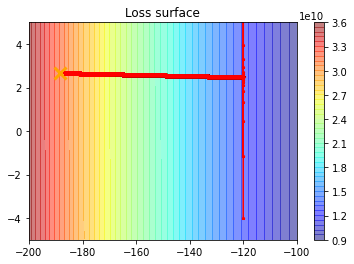

In [11]:
w0, b0 = -4, -120
lr = 1e-6
maxiter = 1000000
GD = optimizers(X, Y, lr, 'GD')
Demo(w0, b0, lr, maxiter, X, Y, GD)

## Adagrad

iteration: 88972, time: 4.8156 sec, (b,w)=(-188.2899, 2.6690)


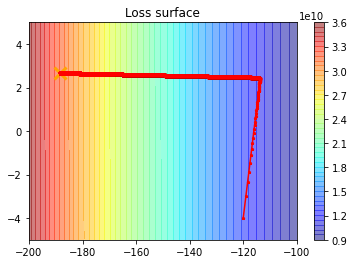

In [12]:
w0, b0 = -4., -120.
lr = 1
maxiter = 1000000
Adagrad = optimizers(X, Y, lr, 'adagrad')
Demo(w0, b0, lr, maxiter, X, Y, Adagrad)

## RMSprop

iteration: 1000000, time: 53.0784 sec, (b,w)=(-188.4382, 2.6645)


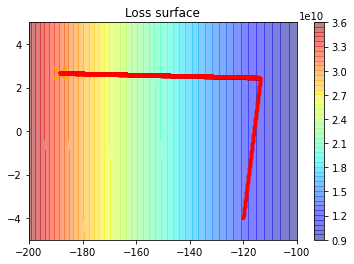

In [13]:
w0, b0 = -4, -120
lr = 0.01
maxiter = 1000000
RMS = optimizers(X, Y, lr, 'rms')
RMS.beta1 = 0.9
Demo(w0, b0, lr, maxiter, X, Y, RMS)

## Adam

iteration: 2770, time: 0.2284 sec, (b,w)=(-188.4321, 2.6695)


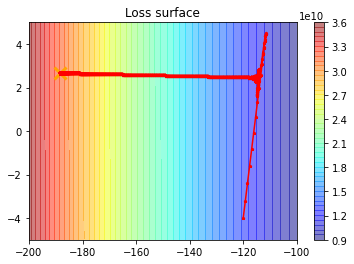

In [44]:
w0, b0 = -4, -120
lr = 0.8
maxiter = 1000000
Adam = optimizers(X, Y, lr, 'adam')
Demo(w0, b0, lr, maxiter, X, Y, Adam)

## Adamax

iteration: 12186, time: 0.5401 sec, (b,w)=(-188.4322, 2.6695)


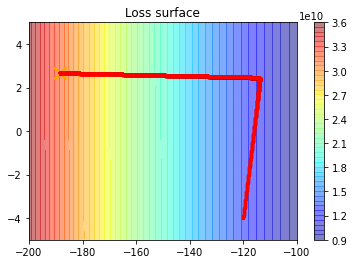

In [15]:
w0, b0 = -4, -120
lr = 0.01
maxiter = 1000000
AdaMax = optimizers(X, Y, lr, 'adamax')
Demo(w0, b0, lr, maxiter, X, Y, AdaMax)

## AdamW

iteration: 5994, time: 0.3226 sec, (b,w)=(-188.3957, 2.6694)


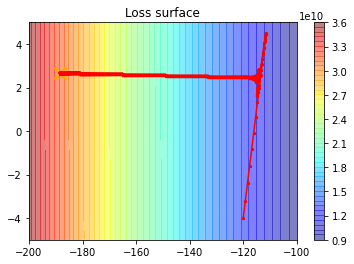

In [43]:
w0, b0 = -4, -120
lr = 0.8
maxiter = 1000000
AdamW = optimizers(X, Y, lr, 'adamw')
Demo(w0, b0, lr, maxiter, X, Y, AdamW)